# Kernels

---

## Gaussian

### Imports

In [40]:
import convolution.kernel 
from domain import equispaced_points

In [41]:
import matplotlib.pyplot as plt

### Constructions

In [42]:
t = equispaced_points(512)

In [43]:
kernel = convolution.kernel.Gaussian(
    domain=t, mean=0, standard_deviation=30
)

In [44]:
print(f'normalalization constant = {kernel.normalization_constant}')
print(f'mean = kernel.mean')
print(f'standard deviation = {kernel.std}')
print(f'parameters = {kernel.parameter}')

normalalization constant = 0.01329807601338109
mean = kernel.mean
standard deviation = 30
parameters = (0.01329807601338109, 0, 30)


## Visualizations

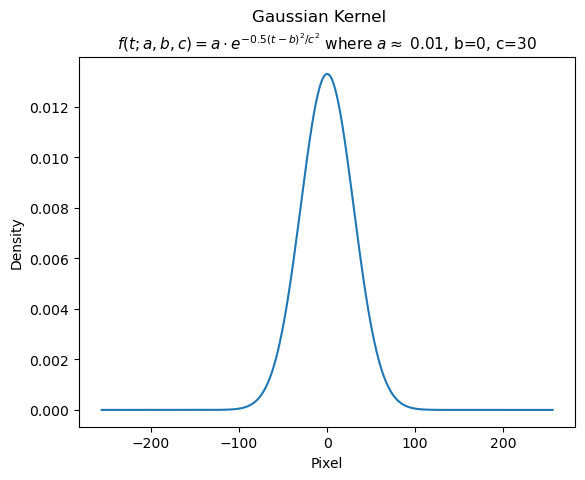

In [45]:
plt.plot(t, kernel.image)
plt.suptitle('Gaussian Kernel')
plt.title(
    r'$f(t; a, b, c) = a\cdot e^{-0.5(t-b)^2 / c^2}$ where ' + r'$a\approx$ ' + f'{kernel.parameter[0]:0.1}, ' + 
    f'b={kernel.parameter[1]}, ' + f'c={kernel.parameter[2]}', 
    fontsize=11
)
plt.xlabel('Pixel')
plt.ylabel('Density');

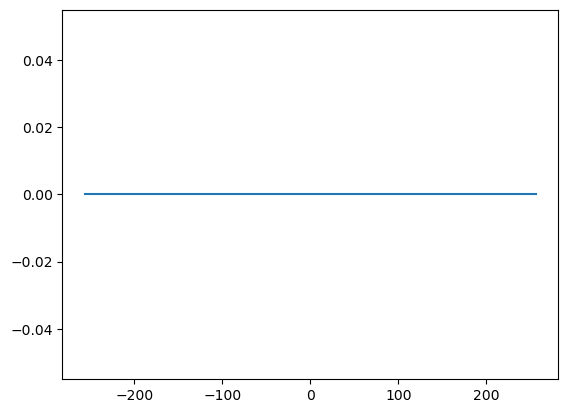

In [46]:
plt.plot(t, kernel.derivative_wrt_mean);

In [47]:
kernel.mean = 1

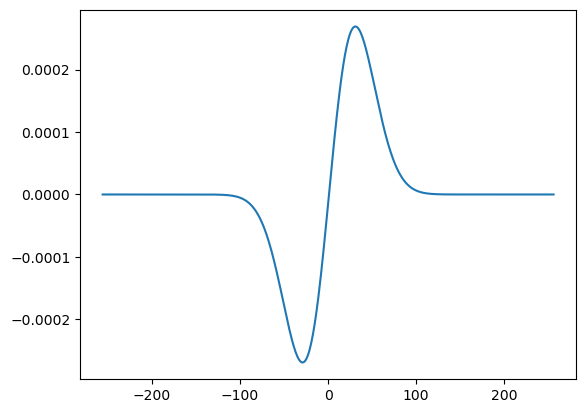

In [48]:
plt.plot(t, kernel.derivative_wrt_mean);

In [49]:
kernel.mean = 0

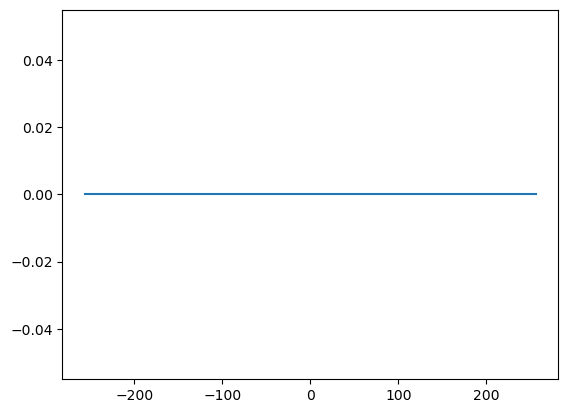

In [50]:
plt.plot(t, kernel.derivative_wrt_mean);

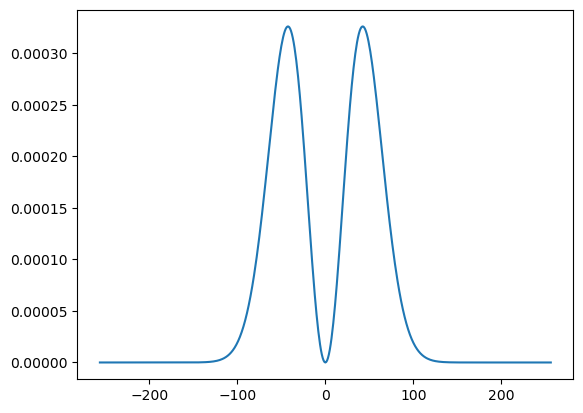

In [51]:
plt.plot(t, kernel.derivative_wrt_std);

## Mixture of Gaussians

In [52]:
g1 = convolution.kernel.Gaussian(t, mean=-50, standard_deviation=30)
g2 = convolution.kernel.Gaussian(t, mean=0, standard_deviation=30)
g3 = convolution.kernel.Gaussian(t, mean=50, standard_deviation=30)

In [53]:
w1 = w2 = w3 = 1/3

In [54]:
kernel_mixture = convolution.kernel.Mixture(
    weights=[w1, w2, w3], 
    kernels=[g1, g2, g3]
)

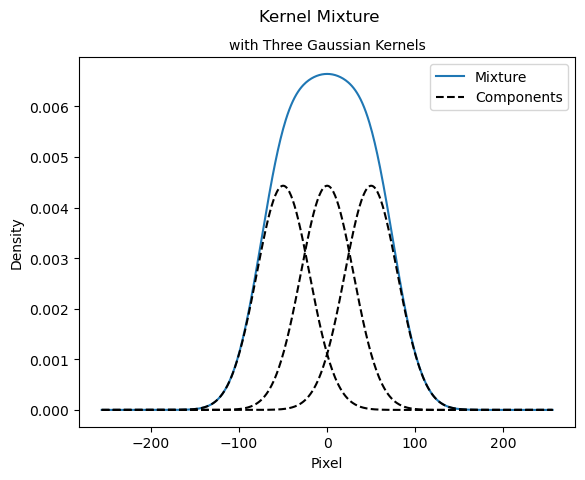

In [66]:
plt.plot(t, kernel_mixture.image, label='Mixture')
plt.plot(t, w1 * g1.image, 'k--', label='Components')
plt.plot(t, w2 * g2.image, 'k--')
plt.plot(t, w3 * g3.image, 'k--')
plt.legend()
plt.suptitle('Kernel Mixture')
plt.title('with Three Gaussian Kernels', fontsize=10)
plt.xlabel('Pixel')
plt.ylabel('Density');